# Principal Component Analysis

## Steps involved in PCA

1. Center the data
2. Compute Covariance Matrix
3. Compute the eigen vectors of the Covariance Matrix
4. Select top eigen vectors that captures most of the information
5. Project the original data onto these eigen vectors

In [1]:
import glob
from matplotlib import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [2]:
def load_images(directory):
    images = []
    for filename in glob.glob(directory+'*.jpg'):
        img = np.array(image.imread(filename))
        gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(gimg)

        height, width = gimg.shape
        
    return images

In [3]:
imgs = load_images('./Dogs/')

In [4]:
len(imgs)

55

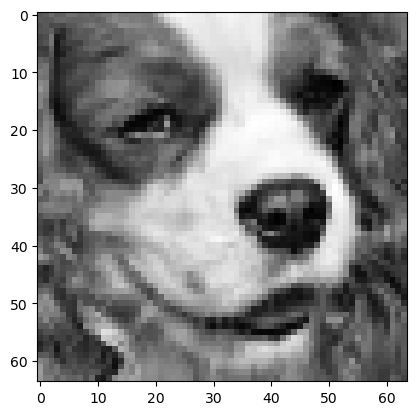

In [5]:
plt.imshow(imgs[0], cmap = 'gray')

In [6]:
# Flattening the images
images = []
for img in imgs:
    images.append(img.reshape(-1))
images = np.array(images)

In [7]:
images.shape

(55, 4096)

## Step 1: Center the data

In [8]:
def center_data(mat):
    mean_vector = np.mean(mat, axis = 0)
    mean_vector = mean_vector.reshape(1, mean_vector.shape[0])
    mean_matrix = np.repeat(mean_vector, mat.shape[0], axis = 0)
    return mat - mean_matrix

In [9]:
centered_imgs = center_data(images)
centered_imgs.shape

(55, 4096)

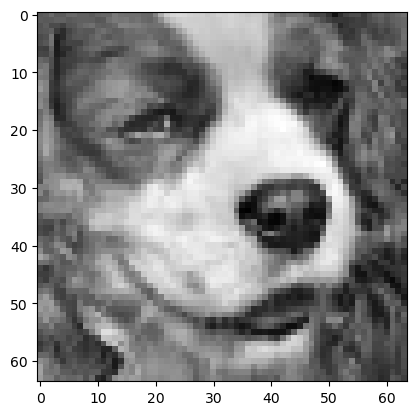

In [10]:
plt.imshow(centered_imgs[0].reshape(64,64), cmap = 'gray')

## Step 2: Compute Covariance Matrix

Covariance Matrix = (1/(n - 1)) * (A - M)Tran . (A - M)

In [11]:
def covariance_matrix(centered_mat):
    return (1/(centered_mat.shape[0] - 1)) * (centered_mat.T @ centered_mat)

In [12]:
cov_mat = covariance_matrix(centered_imgs)
cov_mat.shape

(4096, 4096)

## Step 3: Compute Eigen Values and Vectors


In [13]:
# scipy.random.seed(7)
eigenvals, eigenvecs = scipy.sparse.linalg.eigsh(cov_mat, k=55)
print(f'Ten largest eigenvalues: \n{eigenvals[-10:]}')

Ten largest eigenvalues: 
[ 395241.28103609  431843.53435752  488135.88612538  564010.25811037
  597096.88962285  929361.9513988  1202710.91490936 1331518.83234687
 1870664.10634881 3584736.665176  ]


In [14]:
eigenvals = eigenvals[::-1]
eigenvecs = eigenvecs[:,::-1]

print(f'Ten largest eigenvalues: \n{eigenvals[:10]}')

Ten largest eigenvalues: 
[3584736.665176   1870664.10634881 1331518.83234687 1202710.91490936
  929361.9513988   597096.88962285  564010.25811037  488135.88612538
  431843.53435752  395241.28103609]


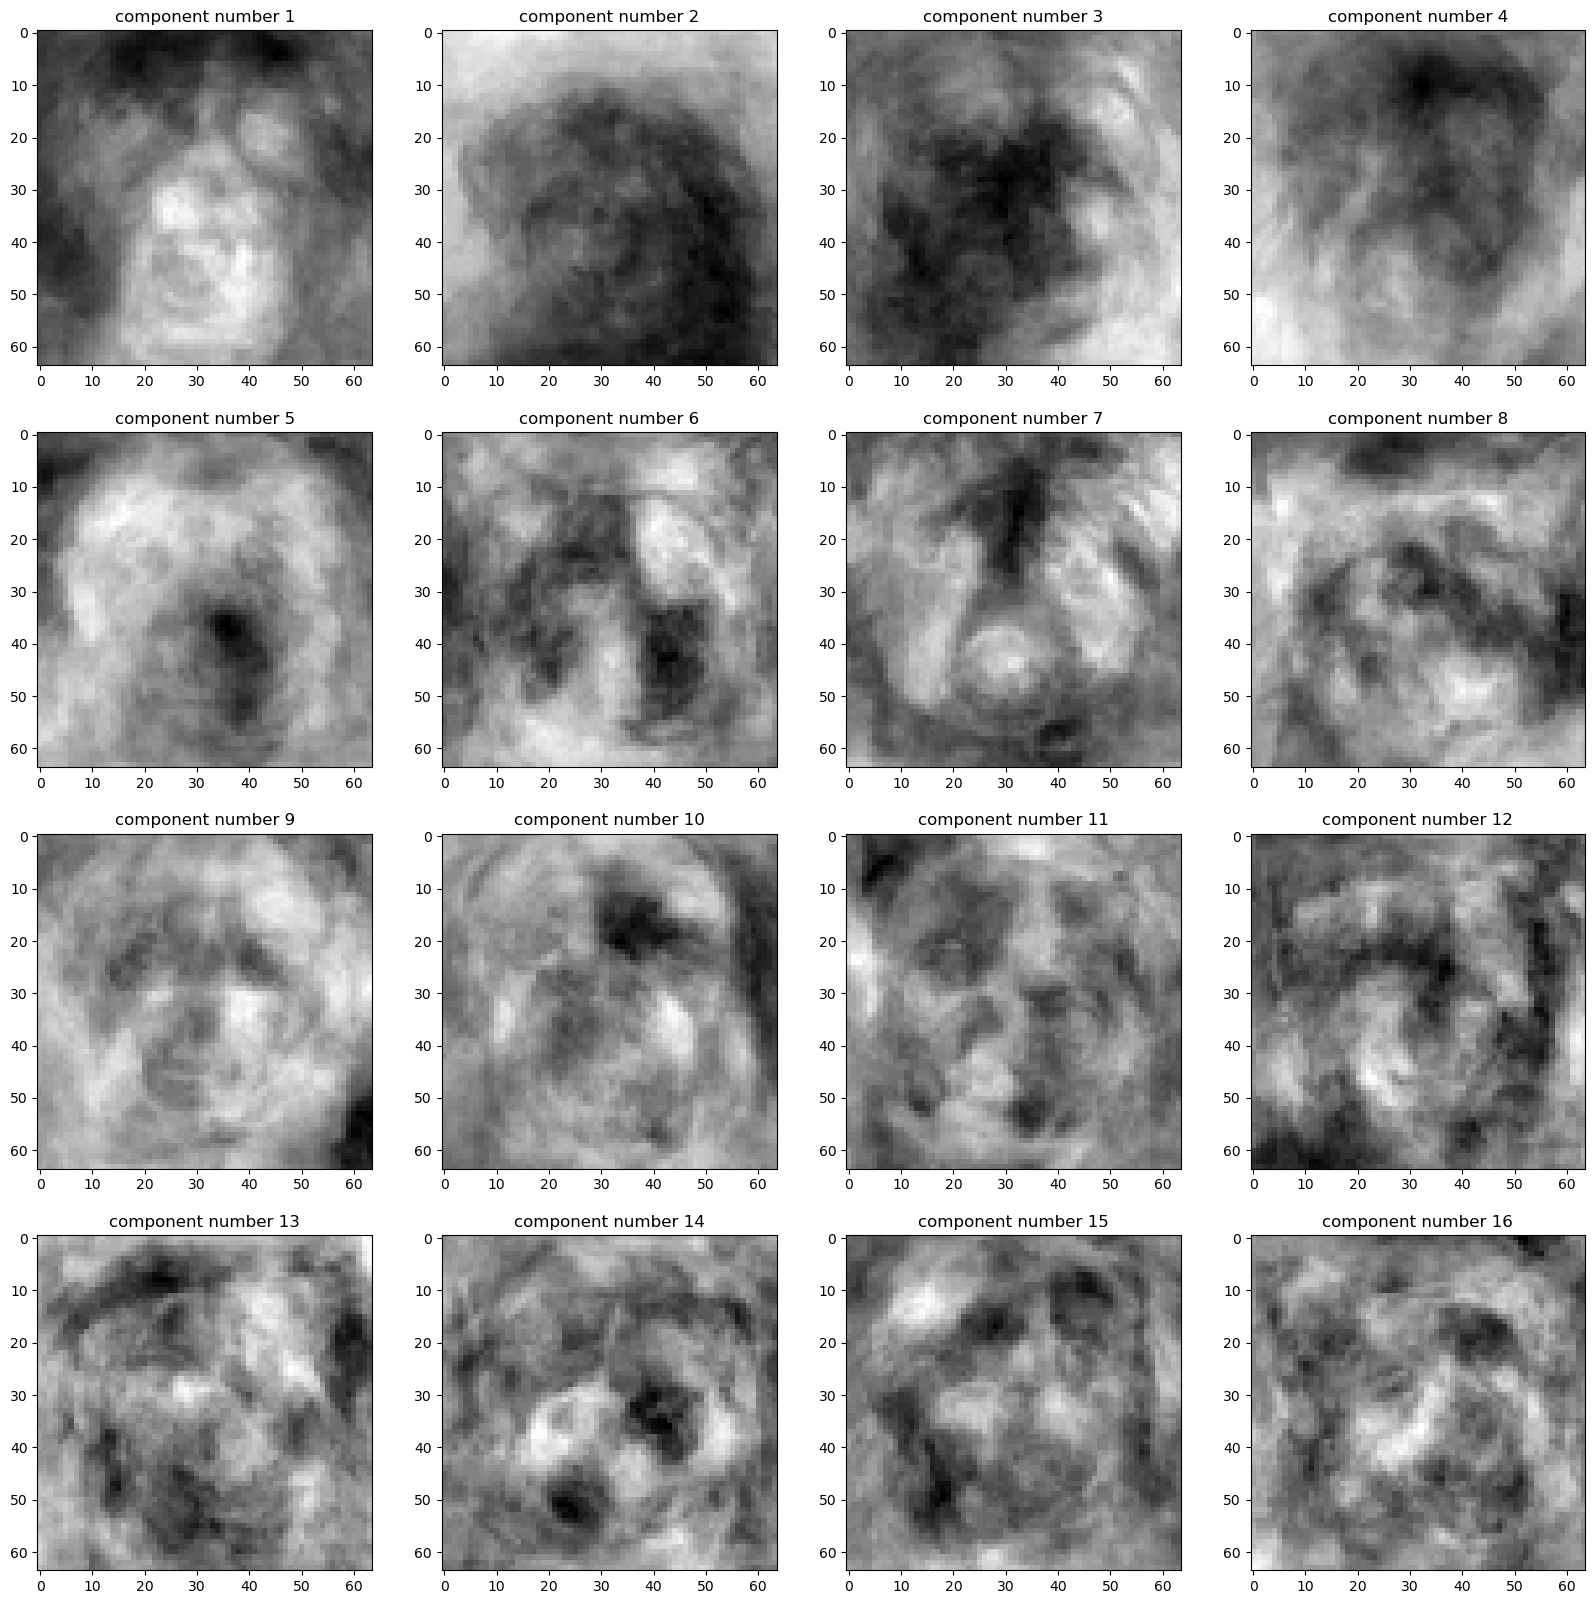

In [15]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
for n in range(4):
    for k in range(4):
        ax[n,k].imshow(eigenvecs[:,n*4+k].reshape(64,64), cmap='gray')
        ax[n,k].set_title(f'component number {n*4+k+1}')

In [16]:
# Program for 1,2,3,4,5,6,7 pattern with 4 columns

for i in range(4):
    for j in range(4):
        print( (i * 4) + j + 1 , end = ' ')
    print()

1 2 3 4 
5 6 7 8 
9 10 11 12 
13 14 15 16 


In [17]:
def performPCA(X, eigenvecs, k):
    v = eigenvecs[:, 0: k]
    return X @ v

In [18]:
onecomponent = performPCA(images,eigenvecs,1)
onecomponent.shape

(55, 1)

In [19]:
twocomponent = performPCA(images,eigenvecs,2)
twocomponent.shape

(55, 2)

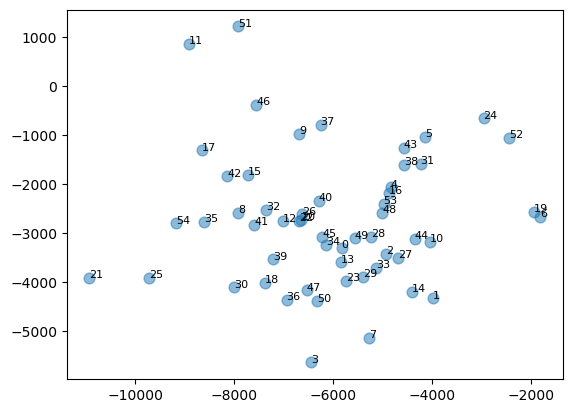

In [20]:
plt.scatter(twocomponent[:,0],twocomponent[:,1], s = 60, alpha = 0.5)
for i in range(len(twocomponent)):
    plt.text(twocomponent[i,0], twocomponent[i,1], str(i),size=8)

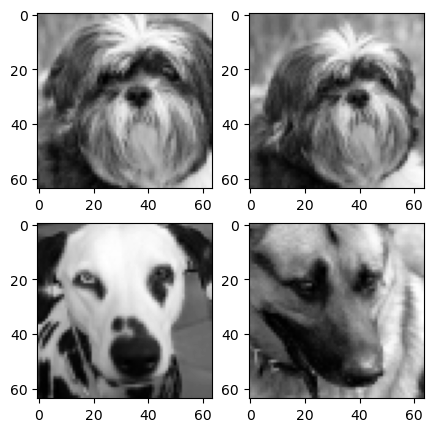

In [21]:
# Similar dogs
fig, ax = plt.subplots(2,2, figsize=(5,5))
ax[0,0].imshow(imgs[20], cmap = 'gray')
ax[0,1].imshow(imgs[26], cmap = 'gray')
ax[1,0].imshow(imgs[12], cmap = 'gray')
ax[1,1].imshow(imgs[32], cmap = 'gray')

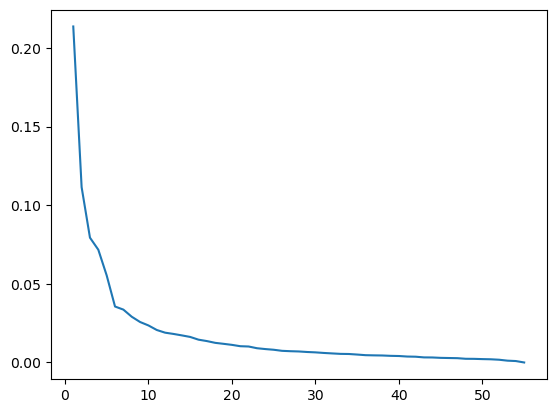

In [22]:
explained_variance = eigenvals/sum(eigenvals)
plt.plot(np.arange(1,56), explained_variance)

In [23]:
def reconstruct_image(Xred, eigenvecs):
    X_reconstructed = Xred.dot(eigenvecs[:,:Xred.shape[1]].T)

    return X_reconstructed

Text(0.5, 1.0, 'reconstructed from 30 components')

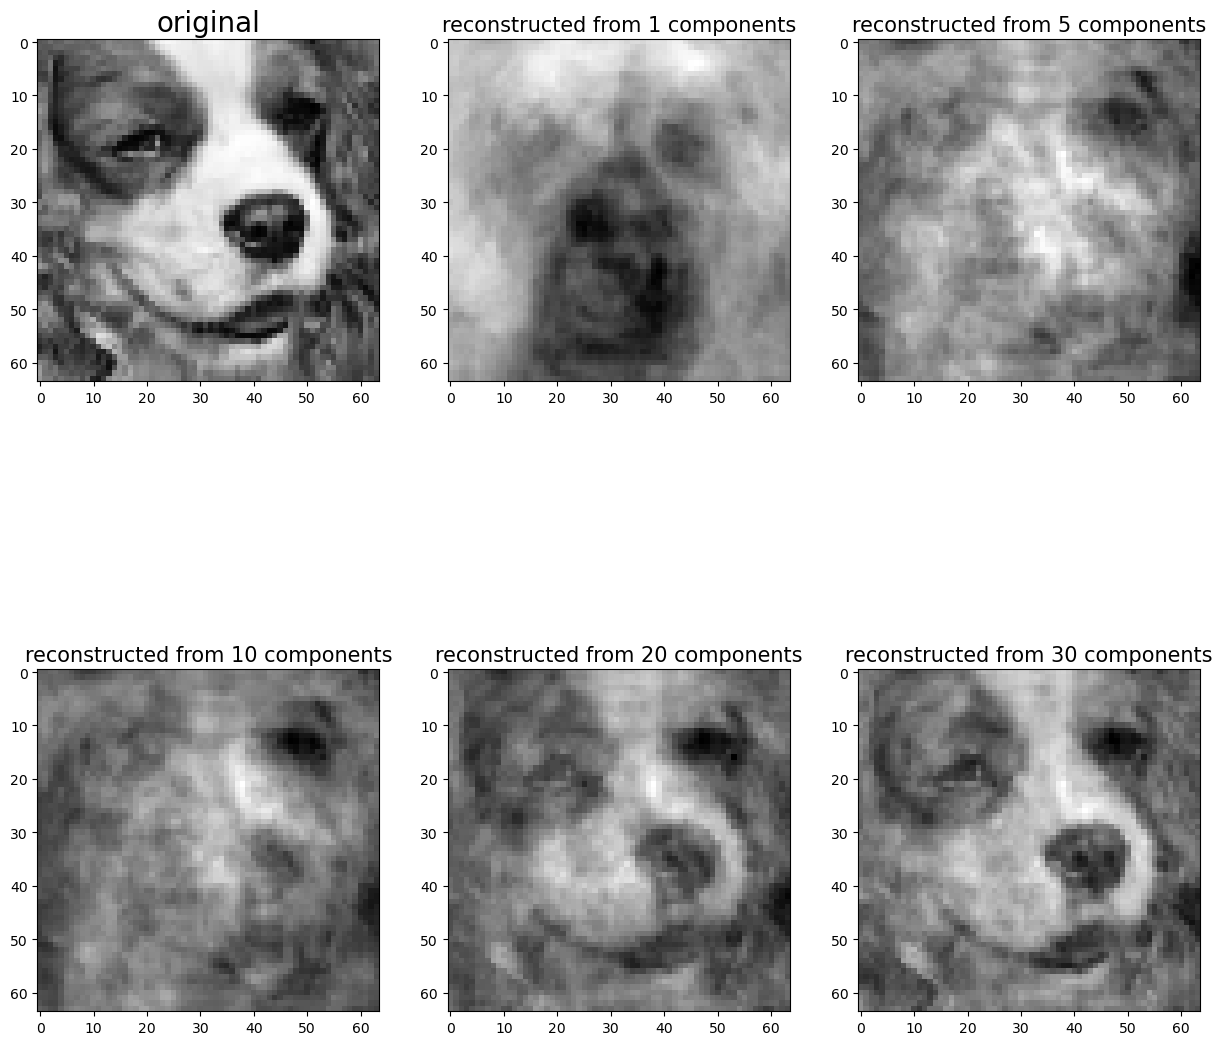

In [28]:
Xred1 = performPCA(images, eigenvecs,1) # reduce dimensions to 1 component
Xred5 = performPCA(images, eigenvecs, 5) # reduce dimensions to 5 components
Xred10 = performPCA(images, eigenvecs, 10) # reduce dimensions to 10 components
Xred20 = performPCA(images, eigenvecs, 20) # reduce dimensions to 20 components
Xred30 = performPCA(images, eigenvecs, 30) # reduce dimensions to 30 components
Xrec1 = reconstruct_image(Xred1, eigenvecs) # reconstruct image from 1 component
Xrec5 = reconstruct_image(Xred5, eigenvecs) # reconstruct image from 5 components
Xrec10 = reconstruct_image(Xred10, eigenvecs) # reconstruct image from 10 components
Xrec20 = reconstruct_image(Xred20, eigenvecs) # reconstruct image from 20 components
Xrec30 = reconstruct_image(Xred30, eigenvecs) # reconstruct image from 30 components


height = 64
width = 64
fig, ax = plt.subplots(2,3, figsize=(15,15))
ax[0,0].imshow(imgs[0], cmap='gray')
ax[0,0].set_title('original', size=20)
ax[0,1].imshow(Xrec1[0].reshape(height,width), cmap='gray')
ax[0,1].set_title('reconstructed from 1 components', size=15)
ax[0,2].imshow(Xrec5[0].reshape(height,width), cmap='gray')
ax[0,2].set_title('reconstructed from 5 components', size=15)
ax[1,0].imshow(Xrec10[0].reshape(height,width), cmap='gray')
ax[1,0].set_title('reconstructed from 10 components', size=15)
ax[1,1].imshow(Xrec20[0].reshape(height,width), cmap='gray')
ax[1,1].set_title('reconstructed from 20 components', size=15)
ax[1,2].imshow(Xrec30[0].reshape(height,width), cmap='gray')
ax[1,2].set_title('reconstructed from 30 components', size=15)



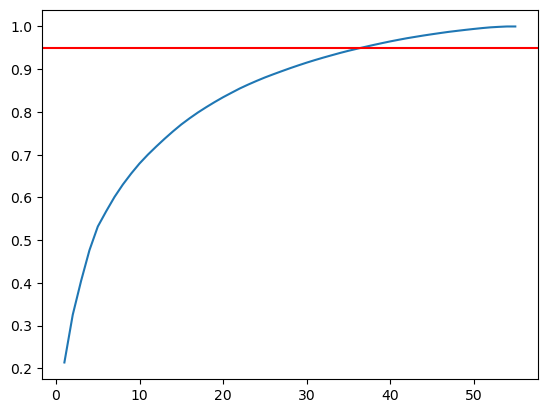

In [25]:
explained_cum_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1,56), explained_cum_variance)
plt.axhline(y=0.95, color='r')

Text(0.5, 1.0, 'Reconstructed')

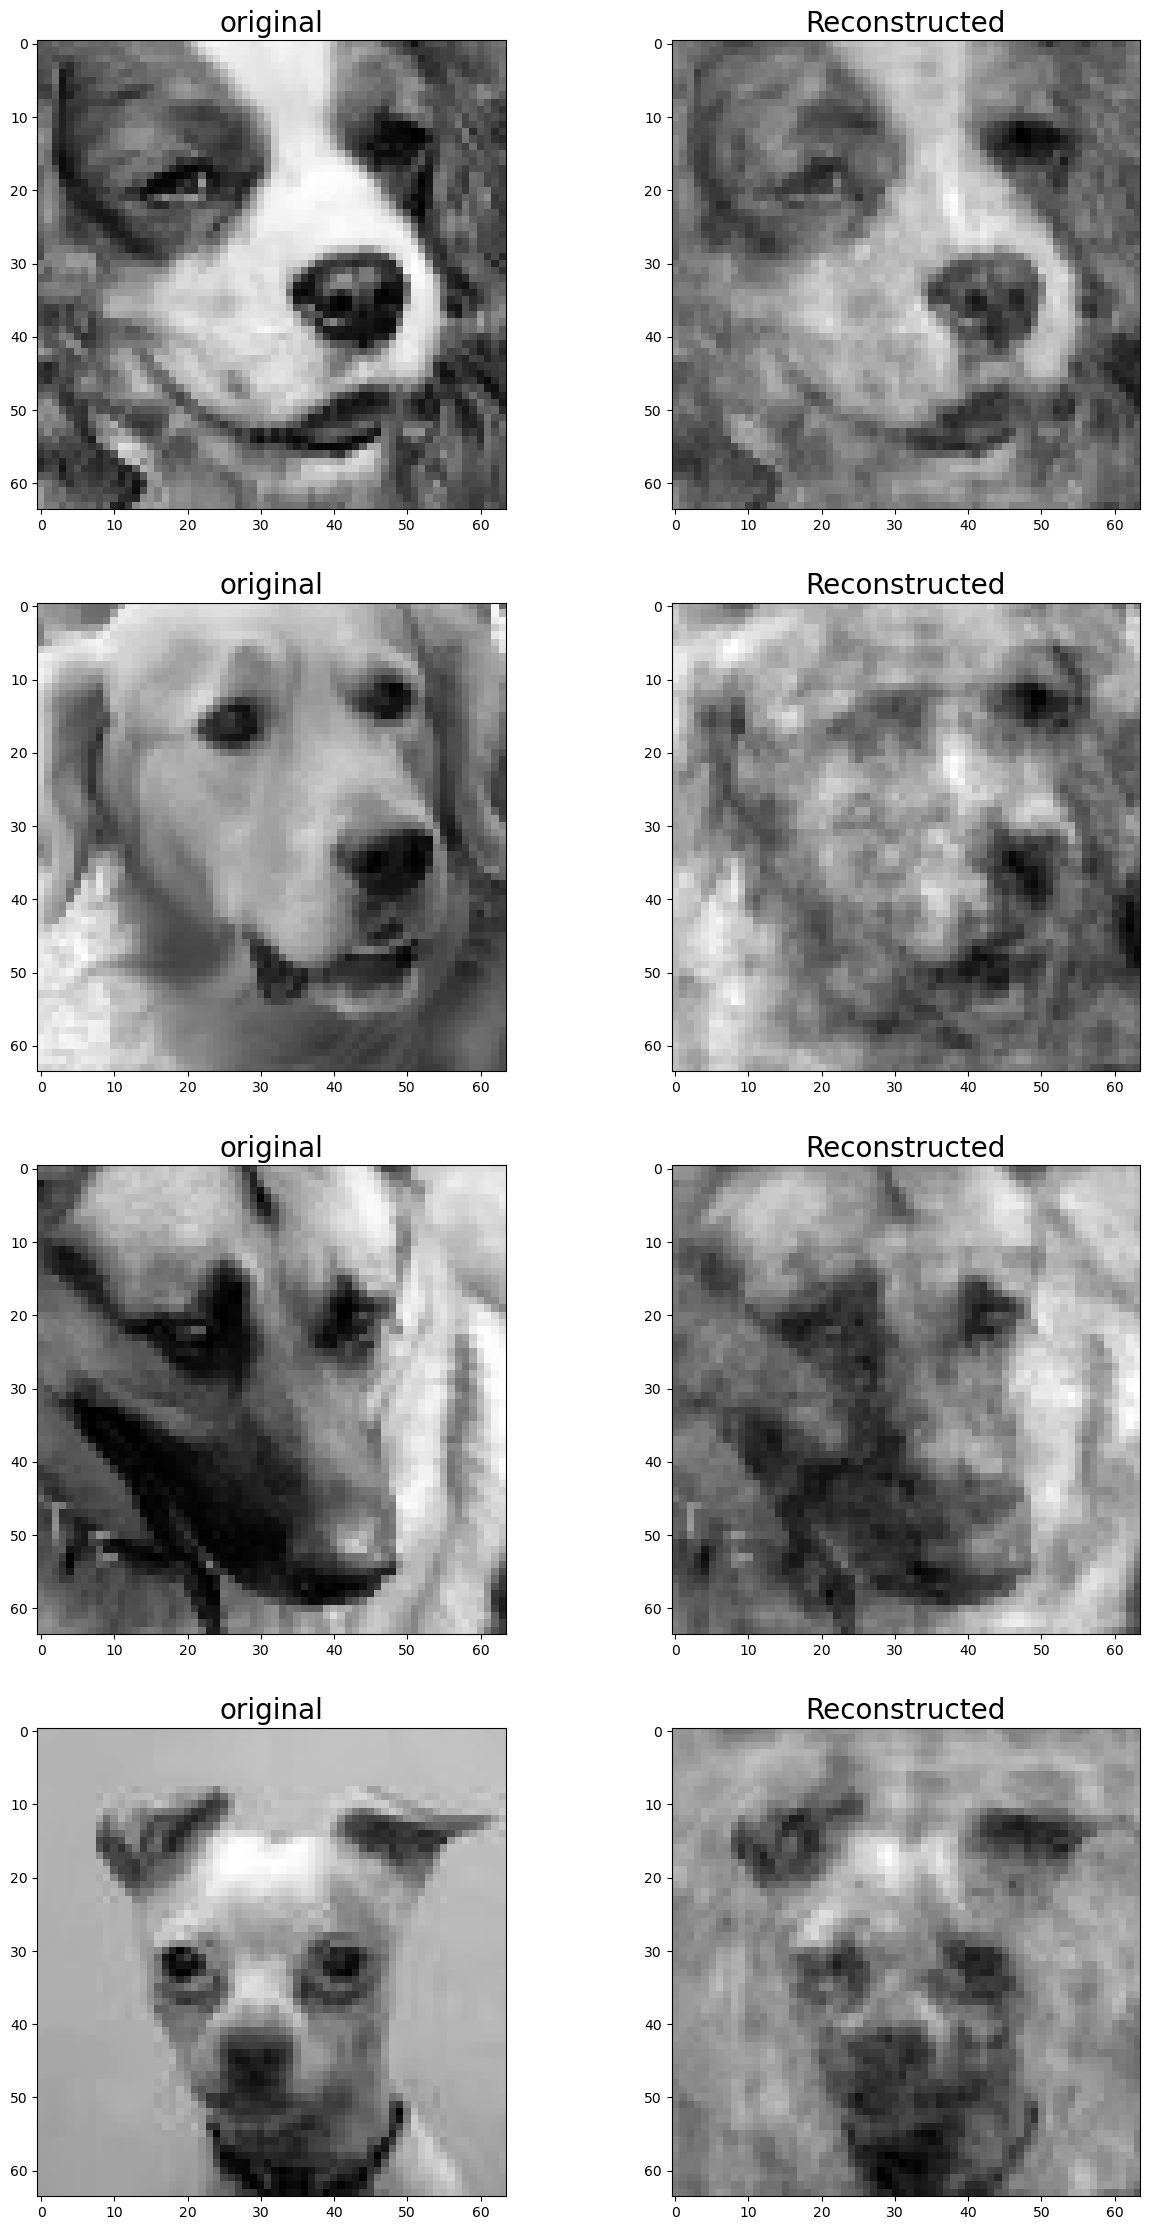

In [26]:
Xred35 = performPCA(images, eigenvecs, 35) # reduce dimensions to 35 components
Xrec35 = reconstruct_image(Xred35, eigenvecs) # reconstruct image from 35 components

fig, ax = plt.subplots(4,2, figsize=(15,28))
ax[0,0].imshow(imgs[0], cmap='gray')
ax[0,0].set_title('original', size=20)
ax[0,1].imshow(Xrec35[0].reshape(height, width), cmap='gray')
ax[0,1].set_title('Reconstructed', size=20)

ax[1,0].imshow(imgs[15], cmap='gray')
ax[1,0].set_title('original', size=20)
ax[1,1].imshow(Xrec35[15].reshape(height, width), cmap='gray')
ax[1,1].set_title('Reconstructed', size=20)

ax[2,0].imshow(imgs[32], cmap='gray')
ax[2,0].set_title('original', size=20)
ax[2,1].imshow(Xrec35[32].reshape(height, width), cmap='gray')
ax[2,1].set_title('Reconstructed', size=20)

ax[3,0].imshow(imgs[54], cmap='gray')
ax[3,0].set_title('original', size=20)
ax[3,1].imshow(Xrec35[54].reshape(height, width), cmap='gray')
ax[3,1].set_title('Reconstructed', size=20)
